In [1]:
# import matplotlib, seaborn, and pandas libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# read the CSV files
movies = pd.read_csv("movies.csv")
ott = pd.read_excel("ott.xlsx")

print(movies.dtypes)
print(movies.shape)
print(movies.columns)

ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object
(16744, 11)
Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')


In [3]:
print(ott.dtypes)
print(ott.shape)
print(ott.columns)

ID             int64
Netflix        int64
Hulu           int64
Prime Video    int64
Disney+        int64
dtype: object
(16744, 5)
Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')


In [4]:
movies_ott = pd.merge(movies, ott, on='ID', how='left')
movies_ott.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


<AxesSubplot:xlabel='Age', ylabel='count'>

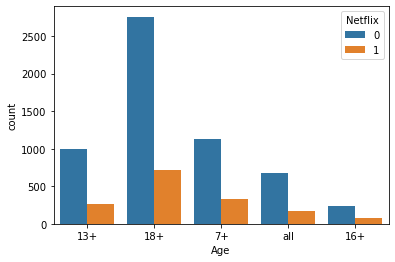

In [9]:
# What age group had the most-streamed movies?
sns.countplot(x="Age", hue="Netflix", data=movies_ott)

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

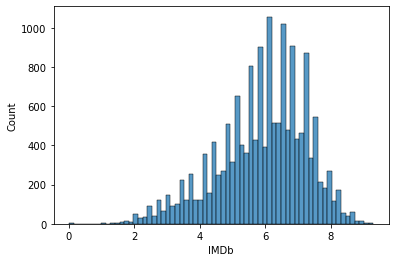

In [11]:
# Plot a histogram for the IMDb rating column
sns.histplot(data=movies_ott, x="IMDb")

<AxesSubplot:xlabel='IMDb', ylabel='Count'>

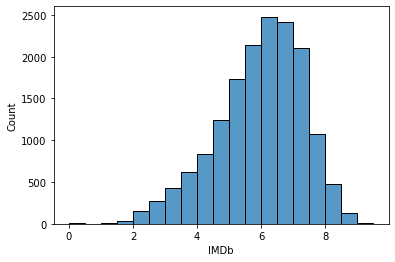

In [13]:
sns.histplot(data=movies_ott, x="IMDb", binwidth=0.5)

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='IMDb'>

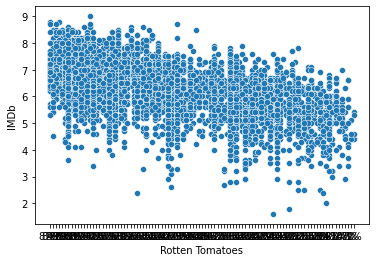

In [14]:
# Plot a scatterplot to display the correlation between the ratings from Rotten Tomatoes and IMDb.
sns.scatterplot(x="Rotten Tomatoes", y="IMDb", data=movies_ott)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

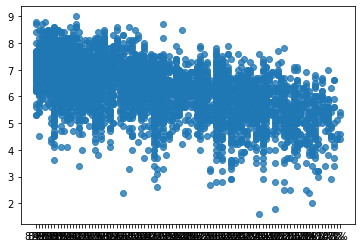

In [17]:
sns.regplot(x="Rotten Tomatoes", y="IMDb", data=movies_ott)

In [18]:
# Plot a boxplot to display the outliers when comparing the user age and their IMDb ratings for the movies
movies_ott.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime', 'Netflix', 'Hulu',
       'Prime Video', 'Disney+'],
      dtype='object')

In [19]:
ott.columns

Index(['ID', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'], dtype='object')

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

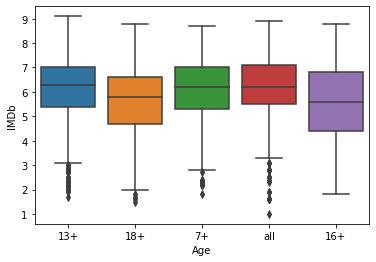

In [20]:
sns.boxplot(x='Age', y='IMDb', data=movies_ott)

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

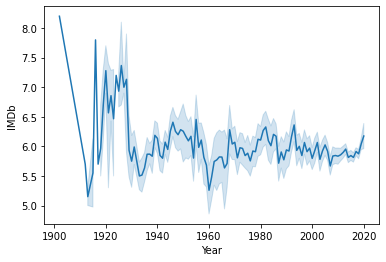

In [21]:
# Plot a lineplot to identify possible trends by comparing the movies' release year and their IMDb ratings.
sns.lineplot(x='Year', y='IMDb', data=movies_ott)

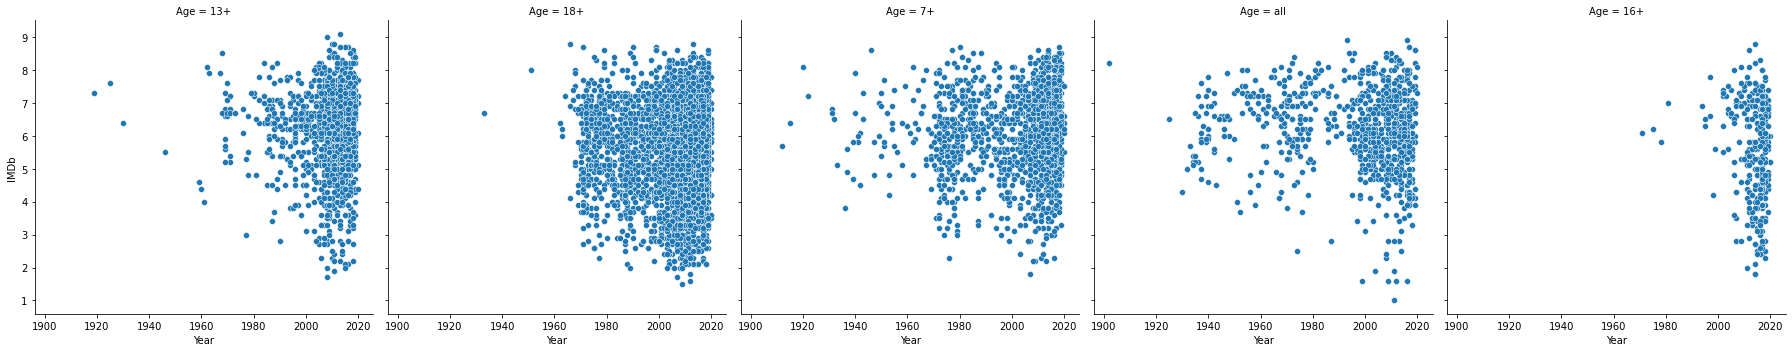

In [22]:
# Enhance the lineplot to include a comparison between the age, rating, and year of release of the movies.
sns.relplot(x="Year", y="IMDb",
            data=movies_ott, col="Age")


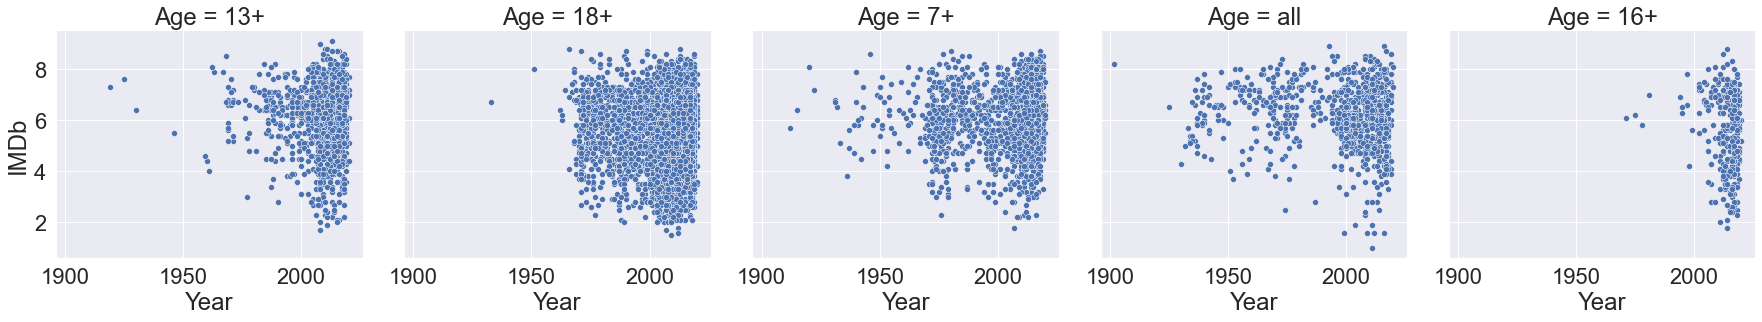

In [32]:
# improve the relational lineplot by increasing font scale
sns.set(font_scale = 2)

sns.relplot(x="Year", y="IMDb",
            data=movies_ott, col="Age")


<AxesSubplot:xlabel='Year', ylabel='IMDb'>

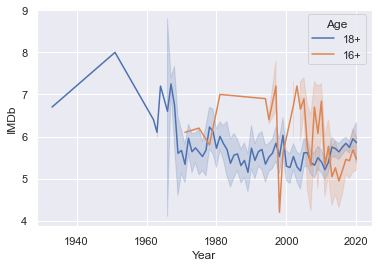

In [40]:
# create lineplots with specification
sns.set(font_scale = 1)
sns.lineplot(x = "Year", y = "IMDb",
             data=movies_ott[movies_ott["Age"].isin(["16+","18+"])],
             hue ="Age")

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

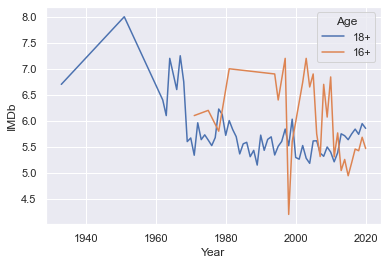

In [39]:
# create lineplots with specification
sns.set(font_scale = 1)
sns.lineplot(x = "Year", y = "IMDb",
             data=movies_ott[movies_ott["Age"].isin(["16+","18+"])],
             hue ="Age", ci=None)